# Homework

---

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class. 

Q2: 
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.



In [1]:
# Question 1
# Given Probabilities
P_pass = 0.9
P_not_pass = 1 - P_pass
P_quick_given_pass = 0.6
P_quick_given_not_pass = 0.3

# Law of Total Probability to calculate P(Quick)
P_quick = (P_quick_given_pass * P_pass) + (P_quick_given_not_pass * P_not_pass)

# Using Bayes' theorem to calculate P(Pass | Quick)
P_pass_given_quick = (P_quick_given_pass * P_pass) / P_quick

P_pass_given_quick

0.9473684210526315

Likelihood:


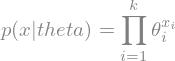

Prior:


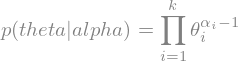

Posterior:


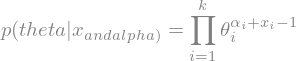

("The posterior distribution is Dirichlet with parameters alpha'_i = x_i + alpha_i.",
 'The posterior is always a proper distribution if the prior is a proper Dirichlet distribution, because the Dirichlet is a conjugate prior for the multinomial likelihood.')

In [34]:
# Question 2
from sympy import symbols, IndexedBase, Product, Eq, init_printing
from IPython.display import display

init_printing()

# Given Symbolic Parameters
theta = IndexedBase('theta')  # theta for probabilities
alpha = IndexedBase('alpha')  # alpha for prior parameters (Dirichlet)
x = IndexedBase('x')          # observed counts for categories
i = symbols('i', integer=True)  # index
k = symbols('k', integer=True, positive=True)  # number of categories

# Likelihood: Multinomial (generalized for k categories)
likelihood = Eq(symbols('p(x|theta)'), Product(theta[i]**x[i], (i, 1, k)))

# Prior: Dirichlet distribution (generalized for k categories)
prior = Eq(symbols('p(theta|alpha)'), Product(theta[i]**(alpha[i] - 1), (i, 1, k)))

# Posterior: Dirichlet update rule (generalized for k categories)
posterior = Eq(symbols('p(theta|x_and_alpha)'), Product(theta[i]**(x[i] + alpha[i] - 1), (i, 1, k)))

# Posterior distribution explanation
posterior_distribution = "The posterior distribution is Dirichlet with parameters alpha'_i = x_i + alpha_i."

# The posterior and prior explanation
explanation = (
    "The posterior is always a proper distribution if the prior is a proper Dirichlet distribution, "
    "because the Dirichlet is a conjugate prior for the multinomial likelihood."
)

print("Likelihood:")
display(likelihood)

print("Prior:")
display(prior)

print("Posterior:")
display(posterior)

posterior_distribution, explanation

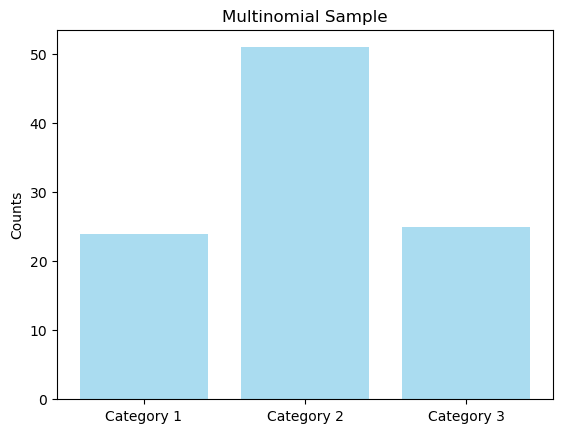

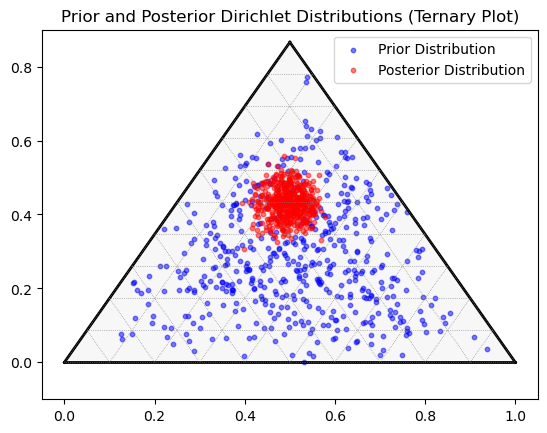

In [38]:
# Question 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial, dirichlet
import ternary

# Define the multinomial distribution and sample
n = 100  # number of trials
p = [0.3, 0.5, 0.2]  # probabilities for each category
multinomial_sample = multinomial.rvs(n, p, size=1)[0]

# Visualize the multinomial distribution and the sample
categories = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories, multinomial_sample, color='skyblue', alpha=0.7)
plt.title('Multinomial Sample')
plt.ylabel('Counts')
plt.show()

# Define prior and posterior Dirichlet distributions
alpha_prior = [2, 2, 2]  # prior Dirichlet parameters
alpha_posterior = alpha_prior + multinomial_sample  # posterior parameters

# Ternary plot setup
figure, tax = ternary.figure(scale=1.0)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="gray", linewidth=0.5)

# Plot prior Dirichlet distribution
prior_samples = dirichlet.rvs(alpha_prior, size=500)
tax.scatter(prior_samples, color='blue', label='Prior Distribution', alpha=0.5, s=10, c=None)

# Plot posterior Dirichlet distribution
posterior_samples = dirichlet.rvs(alpha_posterior, size=500)
tax.scatter(posterior_samples, color='red', label='Posterior Distribution', alpha=0.5, s=10, c=None)

# Finalize ternary plot
tax.legend()
tax.set_title("Prior and Posterior Dirichlet Distributions (Ternary Plot)")
plt.show()

